In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# This makes out plots higher resolution, which makes them easier to see while building
plt.rcParams['figure.dpi'] = 100

In [12]:
# read heat death data
data = pd.read_csv("data/iran_heath_death_projections.csv")

In [13]:
data.head()

,year,death,scenario
0,2020,1736.663,ssp126
1,2040,4463.851,ssp126
2,2060,10561.177,ssp126
3,2080,14279.096,ssp126
4,2100,10356.908,ssp126


/tmp/ipykernel_3791615/889048004.py:93: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([convert_to_farsi_numbers(int(tick)) for tick in ax.get_xticks()])
/tmp/ipykernel_3791615/889048004.py:94: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([convert_to_farsi_numbers(int(tick)) for tick in ax.get_yticks()])


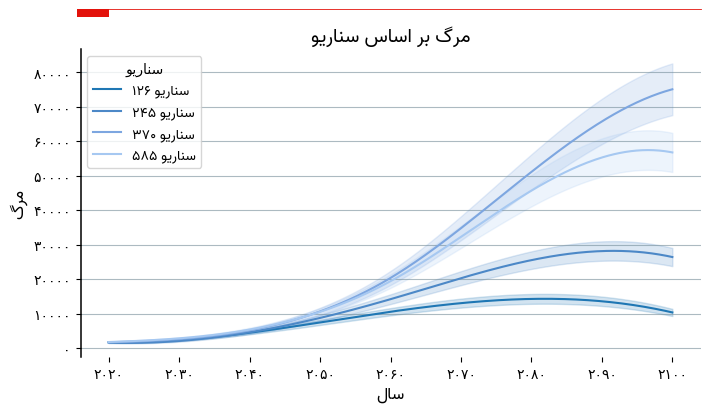

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import font_manager
import arabic_reshaper
from bidi.algorithm import get_display
from scipy.interpolate import make_interp_spline

# Load the data into a DataFrame
data = {
    'year': [2020, 2040, 2060, 2080, 2100, 2020, 2040, 2060, 2080, 2100, 2020, 2040, 2060, 2080, 2100, 2020, 2040, 2060, 2080, 2100],
    'death': [1736.663, 4463.851, 10561.177, 14279.096, 10356.908, 1617.336, 4593.258, 14201.231, 25536.563, 26433.584, 1692.264, 5152.734, 20371.791, 51144.626, 75116.345, 1765.737, 5381.919, 19429.729, 45706.325, 56794.097],
    'scenario': ['ssp126', 'ssp126', 'ssp126', 'ssp126', 'ssp126', 'ssp245', 'ssp245', 'ssp245', 'ssp245', 'ssp245', 'ssp370', 'ssp370', 'ssp370', 'ssp370', 'ssp370', 'ssp585', 'ssp585', 'ssp585', 'ssp585', 'ssp585']
}
df = pd.DataFrame(data)

# Translations for the scenarios
translations = {
    'ssp126': 'سناریو ۱۲۶',
    'ssp245': 'سناریو ۲۴۵',
    'ssp370': 'سناریو ۳۷۰',
    'ssp585': 'سناریو ۵۸۵'
}

# Use different shades of blue
colors = {
    'ssp126': '#1f77b4',  # Blue
    'ssp245': '#4c88c7',  # Lighter Blue
    'ssp370': '#7da6e0',  # Even Lighter Blue
    'ssp585': '#a6c8f1'   # Lightest Blue
}

# Define the confidence interval
def get_confidence_interval(deaths):
    ci = 0.1 * np.array(deaths)  # Assuming a 10% confidence interval for demonstration
    return deaths - ci, deaths + ci

# Prepare the font for Farsi text
farsi_font_path = '/home/saman/.fonts/Vazir-Regular.ttf'  # Replace with your actual path
prop = font_manager.FontProperties(fname=farsi_font_path)

# Function to reshape and display Farsi text properly
def reshape_and_display(text):
    reshaped_text = arabic_reshaper.reshape(text)
    return get_display(reshaped_text)

# Convert numbers to Farsi
def convert_to_farsi_numbers(text):
    farsi_digits = {'0': '۰', '1': '۱', '2': '۲', '3': '۳', '4': '۴', '5': '۵', '6': '۶', '7': '۷', '8': '۸', '9': '۹'}
    return ''.join(farsi_digits.get(char, char) for char in str(text))

# Plotting
fig, ax = plt.subplots(figsize=(8, 4))

# Smooth and plot the data for each scenario
for scenario in df['scenario'].unique():
    scenario_data = df[df['scenario'] == scenario]
    years = scenario_data['year']
    deaths = scenario_data['death']
    
    # Smooth the data using spline interpolation
    years_smooth = np.linspace(years.min(), years.max(), 300)
    spline = make_interp_spline(years, deaths, k=3)
    deaths_smooth = spline(years_smooth)
    
    lower, upper = get_confidence_interval(deaths_smooth)
    
    ax.plot(years_smooth, deaths_smooth, label=reshape_and_display(translations[scenario]), color=colors[scenario])
    ax.fill_between(years_smooth, lower, upper, color=colors[scenario], alpha=0.2)

# Customize the plot
ax.grid(which="major", axis='y', color='#758D99', alpha=0.6, zorder=1)
ax.spines[['top', 'right', 'bottom']].set_visible(False)
ax.spines['left'].set_linewidth(1.1)


# Convert axis labels to Farsi numbers
ax.set_xticklabels([convert_to_farsi_numbers(int(tick)) for tick in ax.get_xticks()])
ax.set_yticklabels([convert_to_farsi_numbers(int(tick)) for tick in ax.get_yticks()])

ax.set_xlabel(reshape_and_display('سال'), fontproperties=prop, fontsize=12)
ax.set_ylabel(reshape_and_display('مرگ'), fontproperties=prop, fontsize=12)
ax.set_title(reshape_and_display('مرگ بر اساس سناریو'), fontproperties=prop, fontsize=14, weight='bold')

ax.legend(title=reshape_and_display('سناریو'), prop=prop)

# Save the plot
plt.savefig('images/death_scenarios.png', dpi=300, bbox_inches="tight", facecolor='white')
plt.show()
